#### Примеры использования данных о возникающих активных областях

Открываем файл `ear.h5` с диска:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

ear_path = '../ear.h5'

# таблицы с описанием базы данных
d_t0 = pd.read_hdf(ear_path, key='beginning', mode='r')
d_t1 = pd.read_hdf(ear_path, key='first_hours', mode='r')
d_t2 = pd.read_hdf(ear_path, key='maximum', mode='r')

# база данных в табличной форме
dat = pd.read_hdf(ear_path, 'ear', mode='r')

##### Широтно-временная диаграмма полных беззнаковых магнитных потоков активных областей

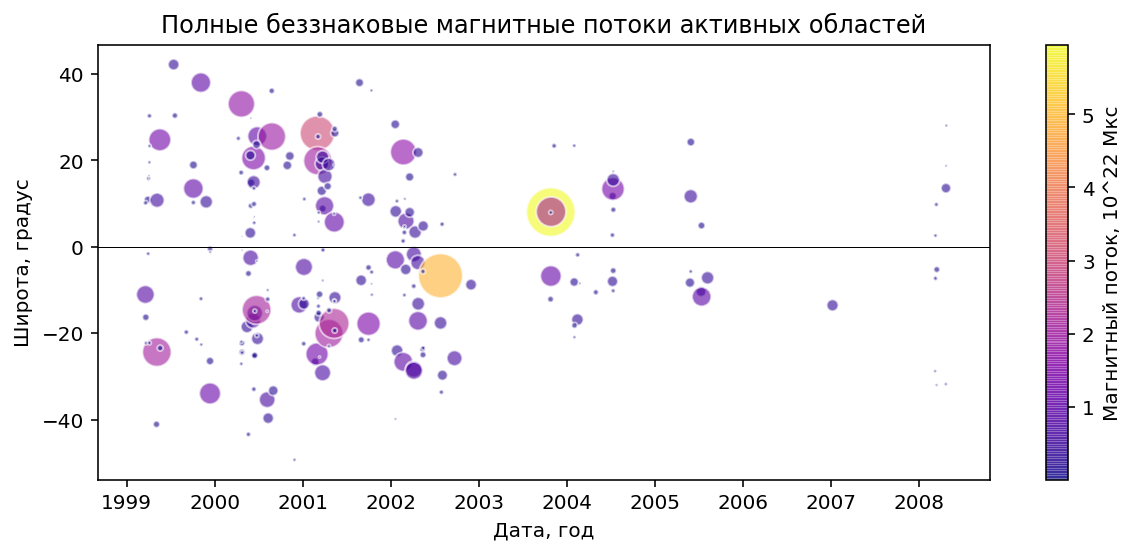

In [2]:
fig, ax = plt.subplots()
ax = dat.plot.scatter(x='time_0',
                       y='lat_0',
                       s=(dat['f_2']-dat['f_0'])/1e20,
                       c=(dat['f_2']-dat['f_0'])/1e22, colormap='plasma',
                       edgecolors='white', alpha=0.6,
                       figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax.set_xlabel('Дата, год')
l2=ax.set_ylabel('Широта, градус')
re=plt.title('Полные беззнаковые магнитные потоки активных областей')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Магнитный поток, 10^22 Мкс')

##### Широтно-временная диаграмма площадей пятен активных областей

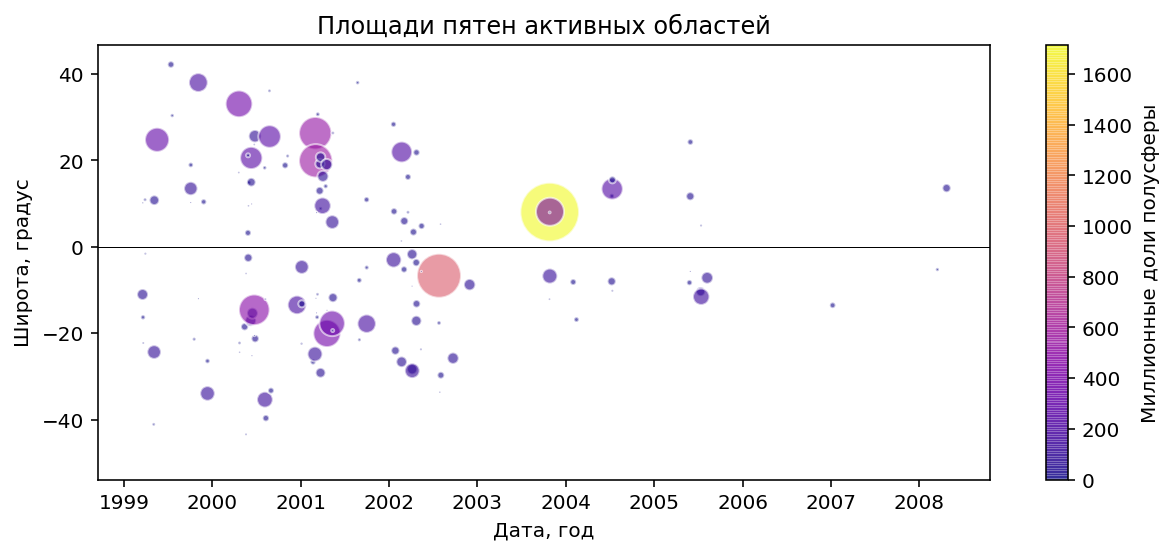

In [3]:
fig, ax = plt.subplots()
ax = dat.plot.scatter(x='time_0',
                      y='lat_0',
                      s=dat['s_a_2']/2,
                      c=dat['s_a_2'], colormap='plasma',
                      edgecolors='white', alpha=0.6,
                      figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax.set_xlabel('Дата, год')
l2=ax.set_ylabel('Широта, градус')
re=plt.title('Площади пятен активных областей')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Миллионные доли полусферы')

##### Гистограмма числа пятен в активных областях

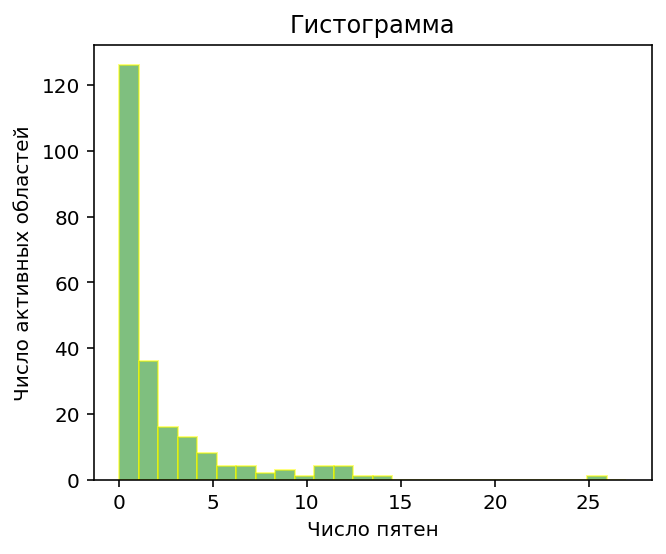

In [4]:
df = dat['s_n_2']
HIST_BINS = np.linspace(0, 27, 27)
n, _ = np.histogram(df, HIST_BINS)

fig, ax = plt.subplots(figsize=(5, 4))
_, _, bar_container = ax.hist(df, HIST_BINS, lw=1,
                              ec='yellow',
                              fc='green',
                              alpha=0.5)

l1=ax.set_xlabel('Число пятен')
l2=ax.set_ylabel('Число активных областей')
re=plt.title('Гистограмма')

##### Связь скорости роста магнитного потока с максимальной напряженностью магнитного поля <br> (активные области, возникающие в центральной части солнечного диска с $\theta$<25º)

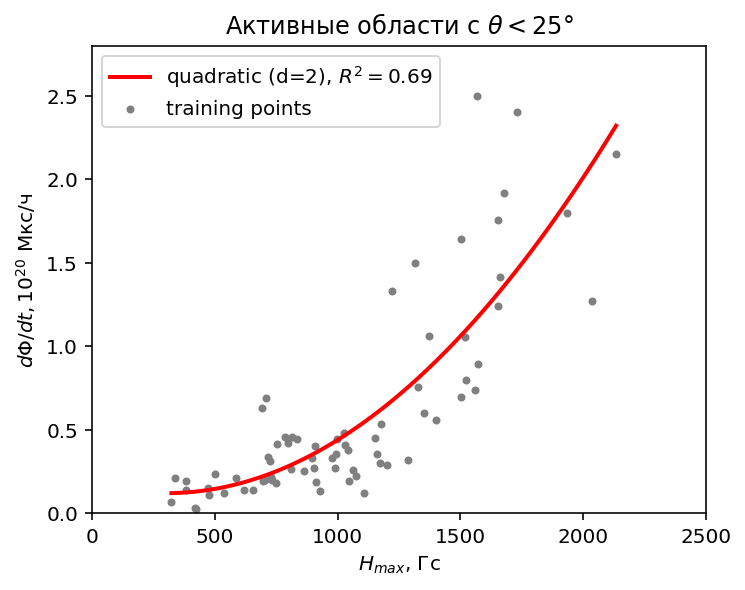

In [5]:
ind = (np.where((dat['th_0'] < 25)))[0]

X = (dat[['hmax_1']].values)[ind]
y = (dat['f_rate_1'].values)[ind]/1e20

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

fig, ax = plt.subplots(figsize=(5.5, 4.3))
plt.scatter(X, y, label='training points', color='gray', marker='.')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2), color='red', lw=2, linestyle='-')
plt.xlabel('$H_{max}$, Гс')
plt.ylabel('$d\Phi/dt, 10^{20}$ Mкс/ч')
plt.title(r'Активные области с $\theta<25\degree$')
plt.xlim(0, 2500)
plt.ylim(0, 2.8)
plt.legend(loc='upper left')

##### Связь наибольшей отрицательной доплеровской скорости с гелиоцентрическим углом <br> в первые часы развития активных областей

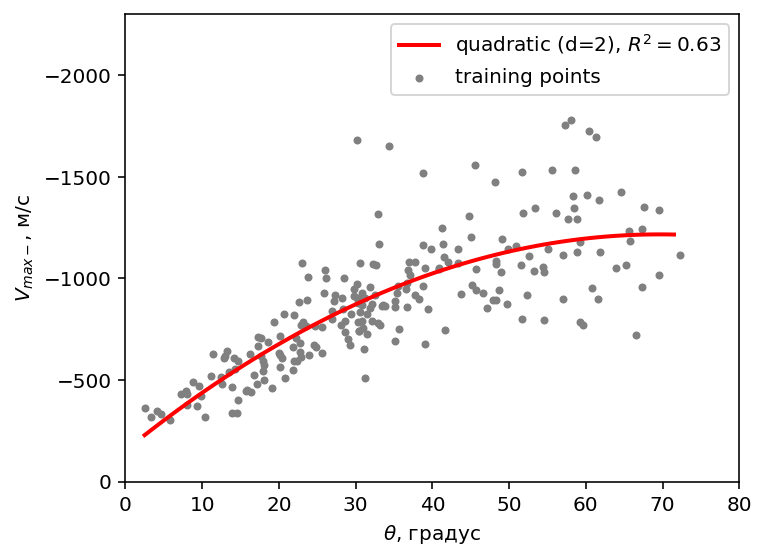

In [6]:
X = dat[['th_vmin_1']].values
y = dat['vmin_1'].values

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

fig, ax = plt.subplots(figsize=(5.5, 4.3))
plt.scatter(X, y, label='training points', color='gray', marker='.')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2), color='red', lw=2, linestyle='-')
plt.xlabel(r'$\theta$, градус')
plt.ylabel('$V_{max-}$, м/c')
plt.xlim(0, 80)
plt.ylim(0, -2300)
plt.legend(loc='upper right')